In [839]:
# Importing necessary libraries for data analysis and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import seaborn as sns

# Reading the dataset from a CSV file into a pandas DataFrame
df= pd.read_csv(r'C:\Online Retail.csv', sep=',')
 # Displaying the first few rows of the DataFrame
df.head()

,InvoiceNo,InvoiceDate,InvoiceTime,StockCode,Description,Quantity,UnitPrice,Totalsale,CustomerID,Country
0,536365,01-12-2010,08:26:00 AM,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,15.30,17850.0,United Kingdom
1,536365,01-12-2010,08:26:00 AM,71053,WHITE METAL LANTERN,6,3.39,20.34,17850.0,United Kingdom
2,536365,01-12-2010,08:26:00 AM,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,22.00,17850.0,United Kingdom
3,536365,01-12-2010,08:26:00 AM,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,20.34,17850.0,United Kingdom
4,536365,01-12-2010,08:26:00 AM,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,20.34,17850.0,United Kingdom


In [840]:
# Getting an overview of the DataFrame (column names, data types, etc.)
df.info()   #get the overview of the data frame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   InvoiceDate  541909 non-null  object 
 2   InvoiceTime  541909 non-null  object 
 3   StockCode    541909 non-null  object 
 4   Description  540455 non-null  object 
 5   Quantity     541909 non-null  int64  
 6   UnitPrice    541909 non-null  float64
 7   Totalsale    541909 non-null  float64
 8   CustomerID   406829 non-null  float64
 9   Country      541909 non-null  object 
dtypes: float64(3), int64(1), object(6)
memory usage: 41.3+ MB


In [841]:
df.describe() # Getting a statistical summary of the DataFrame, 

,Quantity,UnitPrice,Totalsale,CustomerID
count,541909.000000,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,17.987795,15287.690570
std,218.081158,96.759853,378.810824,1713.600303
min,-80995.000000,-11062.060000,-168469.600000,12346.000000
25%,1.000000,1.250000,3.400000,13953.000000
50%,3.000000,2.080000,9.750000,15152.000000
75%,10.000000,4.130000,17.400000,16791.000000
max,80995.000000,38970.000000,168469.600000,18287.000000


In [842]:
df.isnull().sum() # Counting the number of missing values in each column

InvoiceNo           0
InvoiceDate         0
InvoiceTime         0
StockCode           0
Description      1454
Quantity            0
UnitPrice           0
Totalsale           0
CustomerID     135080
Country             0
dtype: int64

In [843]:
# Drop rows where 'CustomerID' is NaN or null
df = df.dropna(subset=['CustomerID'])

In [844]:
df['Description'].fillna('Unknown', inplace=True) #replacing any missing values in the Description with Unknown

In [845]:
df.isnull().sum()  #confirming there are no null values anymore

InvoiceNo      0
InvoiceDate    0
InvoiceTime    0
StockCode      0
Description    0
Quantity       0
UnitPrice      0
Totalsale      0
CustomerID     0
Country        0
dtype: int64

In [846]:
#Eliminating rows where Uniteprice is 0
df = df[df['UnitPrice'] != 0]


In [847]:
df['Description'] = df['Description'].str.strip() # eliminating whitespace from the Description column

In [848]:
distinct_county= df['Country'].unique() # exploring the data set for countries where the orders are going
#distinct_county

In [849]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'],format='%d-%m-%Y', errors = 'coerce') #changing the data type to datetime
df['InvoiceTime'] = pd.to_datetime(df['InvoiceTime'], format='%I:%M:%S %p').dt.time #changing the format to time
df['Quantity'] =pd.to_numeric(df['Quantity'], errors = 'coerce') #changing the data type to float
df['CustomerID'] =df['CustomerID'].astype('object')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406789 entries, 0 to 541908
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406789 non-null  object        
 1   InvoiceDate  406789 non-null  datetime64[ns]
 2   InvoiceTime  406789 non-null  object        
 3   StockCode    406789 non-null  object        
 4   Description  406789 non-null  object        
 5   Quantity     406789 non-null  int64         
 6   UnitPrice    406789 non-null  float64       
 7   Totalsale    406789 non-null  float64       
 8   CustomerID   406789 non-null  object        
 9   Country      406789 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(6)
memory usage: 34.1+ MB


In [850]:
df.duplicated().sum()#checking for duplicates

5225

In [851]:
df.drop_duplicates(inplace=True) #eliminates all duplicates but keeps the initial value

In [852]:
#Calculating the outliers by using Interqurtile Range(IQR). The identified outliers are then sorted and printed in descending order of their total sales.
sales_by_country= df.groupby('Country')['Totalsale'].sum()

Q1= sales_by_country.quantile(0.25) 
Q3 = sales_by_country.quantile(0.75)

IQR = Q1-Q3 # Interquertile range

lower_bound = Q1 - 1.5* IQR
upper_bound = Q3 + 1.5* IQR
outliers = sales_by_country[(sales_by_country < lower_bound) | (sales_by_country > upper_bound)]

print(outliers.sort_values(ascending=False))

Country
United Kingdom          6747156.15
Netherlands              284661.54
EIRE                     250001.78
Germany                  221509.47
France                   196626.05
Australia                137009.77
Switzerland               55739.40
Spain                     54756.03
Belgium                   40910.96
Sweden                    36585.41
Japan                     35340.62
Norway                    35163.46
Portugal                  28995.76
Finland                   22326.74
Channel Islands           20076.39
Denmark                   18768.14
Italy                     16890.51
Cyprus                    12858.76
Austria                   10154.32
Singapore                  9120.39
Poland                     7213.14
Israel                     6988.40
Greece                     4710.52
Iceland                    4310.00
Canada                     3666.38
Unspecified                2660.77
Malta                      2505.47
United Arab Emirates       1902.28
USA         

In [853]:
#Looking for negative values in the Quantity column
check_negative_quantity = df['Quantity']<0
check_negative_quantity.sum()

8872

In [854]:
#Looking for negative values in the Totalsale column
check_negative_sales = df['Totalsale']<0
check_negative_sales.sum()

8872

This script examines a dataset (df) to find transactions where the total sale amount ('Totalsale') is negative. It identifies these transactions and moves the negative sale amounts to a new column called 'Refunds_Amount'. Additionally, to correct the data, it changes these negative sale amounts to 0. Finally, it shows the filtered dataset, highlighting transactions that originally had negative sale amounts. This process helps in managing and visualizing refunds or transactions with incorrect sale values.

In [855]:
# Filter rows where Totalsale is negative
check_negative_sales = df[df['Totalsale'] < 0]

# Move negative Totalsale values to Refunds_Amount
df.loc[df['Totalsale'] < 0, 'Refunds_Amount'] = df['Totalsale']
#assigning the negative values in Totalsale to 0
df.loc[df['Totalsale'] < 0, 'Totalsale'] = 0
# Display the filtered DataFrame
print(check_negative_sales)

       InvoiceNo InvoiceDate InvoiceTime StockCode  \
141      C536379  2010-12-01    09:41:00         D   
154      C536383  2010-12-01    09:49:00    35004C   
235      C536391  2010-12-01    10:24:00     22556   
236      C536391  2010-12-01    10:24:00     21984   
237      C536391  2010-12-01    10:24:00     21983   
...          ...         ...         ...       ...   
540449   C581490  2011-12-09    09:57:00     23144   
541541   C581499  2011-12-09    10:28:00         M   
541715   C581568  2011-12-09    11:57:00     21258   
541716   C581569  2011-12-09    11:58:00     84978   
541717   C581569  2011-12-09    11:58:00     20979   

                             Description  Quantity  UnitPrice  Totalsale  \
141                             Discount        -1      27.50     -27.50   
154      SET OF 3 COLOURED  FLYING DUCKS        -1       4.65      -4.65   
235        PLASTERS IN TIN CIRCUS PARADE       -12       1.65     -19.80   
236      PACK OF 12 PINK PAISLEY TISSUES       

This script examines a dataset (df) to find transactions where the total sale amount ('Quantity') is negative. It identifies these transactions and moves the negative sale amounts to a new column called 'Refunds_Quantity'. Additionally, to correct the data, it changes these negative sale amounts to 0. Finally, it shows the filtered dataset, highlighting transactions that originally had negative sale amounts. This process helps in managing and visualizing refunds or transactions with incorrect sale values.

In [856]:
# Filter rows where Quantity is negative
check_negative_quantity = df[df['Quantity'] < 0]

# Move negative Totalsale values to Refunds_Amount
df.loc[df['Quantity'] < 0, 'Refunds_Quantity'] = df['Quantity']
#assigning the negative values in Quantity to 0
df.loc[df['Quantity'] < 0, 'Quantity'] = 0
# Display the filtered DataFrame
print(check_negative_quantity)

       InvoiceNo InvoiceDate InvoiceTime StockCode  \
141      C536379  2010-12-01    09:41:00         D   
154      C536383  2010-12-01    09:49:00    35004C   
235      C536391  2010-12-01    10:24:00     22556   
236      C536391  2010-12-01    10:24:00     21984   
237      C536391  2010-12-01    10:24:00     21983   
...          ...         ...         ...       ...   
540449   C581490  2011-12-09    09:57:00     23144   
541541   C581499  2011-12-09    10:28:00         M   
541715   C581568  2011-12-09    11:57:00     21258   
541716   C581569  2011-12-09    11:58:00     84978   
541717   C581569  2011-12-09    11:58:00     20979   

                             Description  Quantity  UnitPrice  Totalsale  \
141                             Discount        -1      27.50        0.0   
154      SET OF 3 COLOURED  FLYING DUCKS        -1       4.65        0.0   
235        PLASTERS IN TIN CIRCUS PARADE       -12       1.65        0.0   
236      PACK OF 12 PINK PAISLEY TISSUES       

In [857]:
# Fill NaN values in Refunds_Amount and Refunds_Quantity with 0
df['Refunds_Amount'] = df['Refunds_Amount'].fillna(0)
df['Refunds_Quantity'] = df['Refunds_Quantity'].fillna(0)

In [859]:
# Create a copy of the DataFrame to avoid modifying a slice of the original DataFrame
#df_cleaned = df.copy()

# Standardizing the 'Country' names by stripping whitespaces and capitalizing each word
df['Country'] = df_cleaned['Country'].str.strip().str.title()

# Removing rows with unspecified or community countries
df = df[~df['Country'].isin(['European Community', 'Unspecified'])]

# Replacing EIRE with Ireland and RSA with Republic of South Africa
df.loc[df['Country'] == 'Eire', 'Country'] = 'Ireland'
df.loc[df['Country'] == 'Rsa', 'Country'] = 'Republic Of South Africa'

In [870]:
# Filter rows where Quantity is negative and move to Refunds_Quantity
df.loc[df['Quantity'] < 0, 'Refunds_Quantity'] = df['Quantity']


# Convert Refunds_Quantity to absolute values
df['Refunds_Quantity'] = df['Refunds_Quantity'].abs()

# Group by Country and sum Refunds_Quantity
refunds_by_country = df.groupby('Country')['Refunds_Quantity'].sum().reset_index()

refunds_by_country = refunds_by_country.sort_values(by='Refunds_Quantity', ascending=False)
# Eliminate rows where Refunds_Quantity is 0
refunds_by_country = refunds_by_country[refunds_by_country['Refunds_Quantity'] > 0]
print("Total Quantity of Refunds by Country:")

print(refunds_by_country)


Total Quantity of Refunds by Country:
            Country  Refunds_Quantity
33   United Kingdom          259167.0
15          Ireland            4196.0
12          Germany            1815.0
11           France            1623.0
34              Usa            1424.0
29            Spain            1127.0
22      Netherlands             809.0
18            Japan             798.0
0         Australia             556.0
30           Sweden             446.0
31      Switzerland             305.0
17            Italy             113.0
23           Norway              91.0
3           Belgium              85.0
8    Czech Republic              79.0
25         Portugal              78.0
16           Israel              56.0
1           Austria              54.0
9           Denmark              47.0
7            Cyprus              44.0
10          Finland              38.0
24           Poland              31.0
21            Malta              26.0
6   Channel Islands              12.0
28        Si

The script calculates and displays the refunds ratio for each country, showing the percentage of items refunded relative to the total items sold in that country. It merges data on refunds and total sales quantities by country, computes the ratio, and sorts the results to highlight countries with higher refund rates

In [880]:
# Step 1: Calculate total sales quantity by country
total_sales_by_country = df.groupby('Country')['Quantity'].sum().reset_index()
total_sales_by_country.columns = ['Country', 'Total_Sales_Quantity']  # Rename the column for clarity

# Step 2: Merge refunds_by_country with total_sales_by_country to get total sales quantity
refunds_by_country = refunds_by_country.merge(total_sales_by_country, on='Country', suffixes=('_refunds', '_total_sales'))

# Step 3: Calculate refunds ratio and multiply by 100
refunds_by_country['Refunds_Ratio'] = (refunds_by_country['Refunds_Quantity'] / refunds_by_country['Total_Sales_Quantity']) * 100

# Step 4: Sort by Refunds_Quantity in descending order (optional, if not already sorted)
refunds_by_country = refunds_by_country.sort_values(by='Refunds_Quantity', ascending=False)

# Display the results
print("Refunds Ratio by Country:")
print(refunds_by_country[['Country', 'Refunds_Quantity', 'Total_Sales_Quantity', 'Refunds_Ratio']])


Refunds Ratio by Country:
            Country  Refunds_Quantity  Total_Sales_Quantity  Refunds_Ratio
0    United Kingdom          259167.0               4241305       6.110549
1           Ireland            4196.0                140133       2.994298
2           Germany            1815.0                119154       1.523239
3            France            1623.0                111428       1.456546
4               Usa            1424.0                  2458      57.933279
5             Spain            1127.0                 27933       4.034654
6       Netherlands             809.0                200361       0.403771
7             Japan             798.0                 26016       3.067343
8         Australia             556.0                 83891       0.662765
9            Sweden             446.0                 36078       1.236210
10      Switzerland             305.0                 30082       1.013895
11            Italy             113.0                  8112       1.392998

In [862]:
# Standardizing the 'StockCode' names by stripping whitespaces and capitalizing each word
df['StockCode'] = df_cleaned['StockCode'].str.strip().str.title()

The script identifies the top 10 countries based on the quantity of refunds processed. It filters the original dataset to include only transactions from these top countries and then calculates the total quantity of refunds for each product description within each country. The results are sorted to show the most refunded product for each country, and finally, it displays the top 10 countries along with their respective most refunded products.

In [881]:
# Step 1: Identify the top 10 countries based on Refunds_Quantity
top_10_countries = refunds_by_country.head(10)['Country']

# Step 2: Filter the DataFrame for transactions from these top 10 countries
top_countries_df = df[df['Country'].isin(top_10_countries)]

# Step 3: Group by Country, StockCode, and Description to find the most refunded product for each country
most_refunded_products = top_countries_df.groupby(['Country',  'Description'])['Refunds_Quantity'].sum().reset_index()

# Step 4: Sort the grouped data by Refunds_Quantity in descending order
most_refunded_products = most_refunded_products.sort_values(['Country', 'Refunds_Quantity'], ascending=[True, False])

# Step 5: Get the most refunded product for each country
top_refunded_products_by_country = most_refunded_products.groupby('Country').first().reset_index()

# Display the results
print("Top 10 Countries Based on Refunds_Quantity and Their Most Refunded Products:")
print(top_refunded_products_by_country)


Top 10 Countries Based on Refunds_Quantity and Their Most Refunded Products:
          Country                        Description  Refunds_Quantity
0       Australia          RIBBON REEL SNOWY VILLAGE             120.0
1          France             WRAP CHRISTMAS VILLAGE             250.0
2         Germany      BOYS ALPHABET IRON ON PATCHES             288.0
3         Ireland       36 DOILIES VINTAGE CHRISTMAS             288.0
4           Japan  ROUND SNACK BOXES SET OF 4 FRUITS             624.0
5     Netherlands                             Manual             480.0
6           Spain  VANILLA SCENT CANDLE JEWELLED BOX             288.0
7          Sweden    SET OF 3 BABUSHKA STACKING TINS             240.0
8  United Kingdom        PAPER CRAFT , LITTLE BIRDIE           80995.0
9             Usa             MINI PAINT SET VINTAGE              36.0


In [777]:
#Dropin column Month as we already have that data
#df = df.drop(columns=['Month']) 

In [678]:
# Filtering out rows where 'CustomerID' is 'Unassigned'
df_filtered = df[df['CustomerID'] != 'Unassigned']


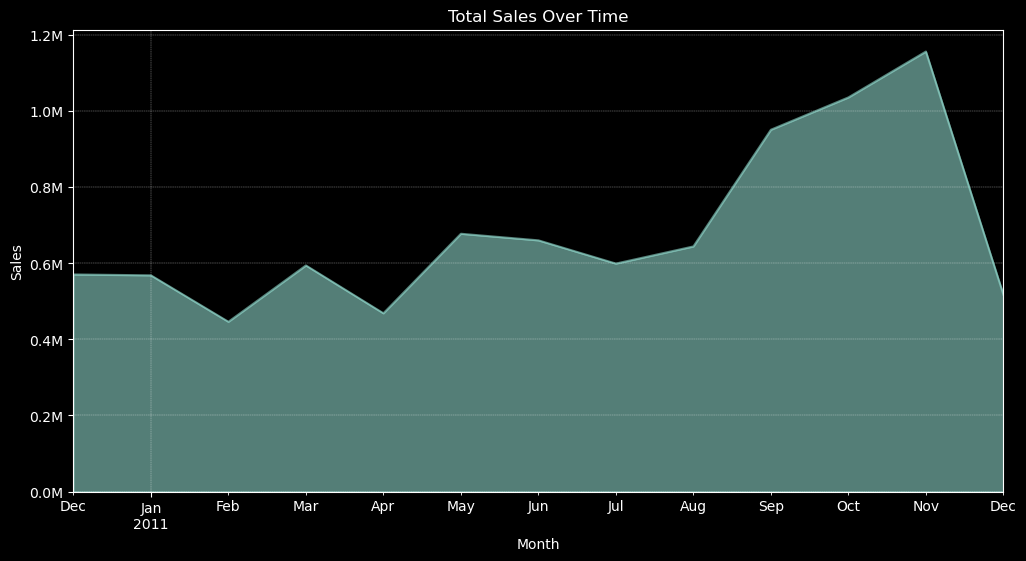

In [679]:
from matplotlib.ticker import FuncFormatter

df['Month'] = df['InvoiceDate'].dt.to_period('M') # 
sales_over_time = df.groupby('Month')['Totalsale'].sum()


plt.style.use('dark_background')
plt.figure(figsize=(12,6))
sales_over_time.plot(kind='area', alpha=0.6)
plt.grid(True, color='w', linestyle='--', linewidth=0.3, alpha=0.7)
plt.title('Total Sales Over Time')
plt.xlabel('Month')
plt.ylabel('Sales')
def millions_formatter(x,pos):
    return f'{x / 1e6:.1f}M'

# Apply the formatter to the y-axis
formatter = FuncFormatter(millions_formatter)
plt.gca().yaxis.set_major_formatter(formatter)
plt.show()

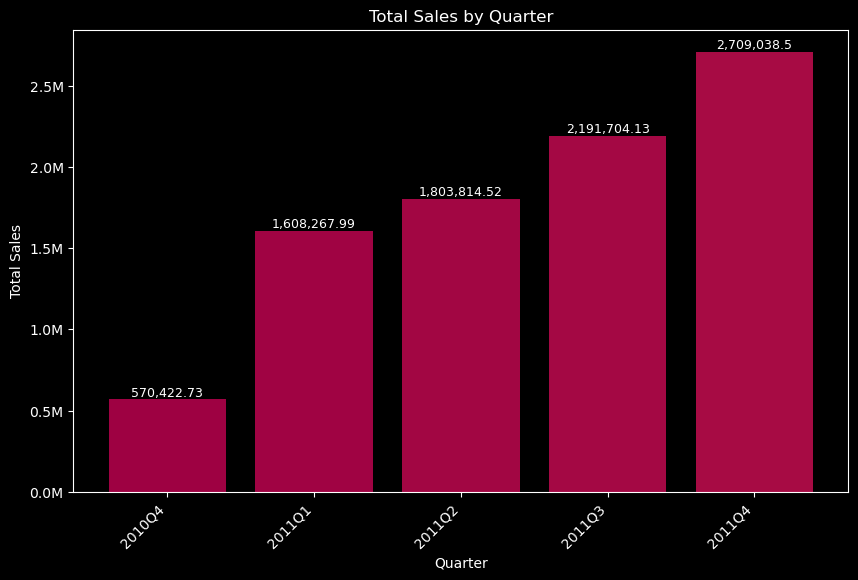

In [638]:
#Sales by quorter

# Creating a new column 'Quarter' by extracting the quarter from 'InvoiceDate'
df['Quarter'] = df['InvoiceDate'].dt.to_period('Q')
# Summing 'Totalsale' by quarter and resetting the index
sales_by_quarter = df.groupby('Quarter')['Totalsale'].sum().reset_index()

# Prepare data for the bar chart
sizes = sales_by_quarter['Totalsale']
labels = sales_by_quarter['Quarter'].astype(str)

# Plotting the bar chart
plt.figure(figsize=(10, 6))

bars = plt.bar(labels, sizes, color=plt.cm.Spectral(range(len(sizes))))
plt.title('Total Sales by Quarter')
plt.xlabel('Quarter')
plt.ylabel('Total Sales')
plt.xticks(rotation=45, ha='right')

# Adding the data labels on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:,}', va='bottom', ha='center', fontsize=9)

# Applying the millions formatter to the y-axis
def millions_formatter(x, pos):
    return f'{x / 1e6:.1f}M'

formatter = FuncFormatter(millions_formatter)
plt.gca().yaxis.set_major_formatter(formatter)


plt.show()


This script groups countries into continents using predefined lists. It matches each country in a DataFrame (df), which includes a 'Country' column, to its corresponding continent based on a predefined dictionary (continent_map). This helps categorize each country under a specific continent label for easier geographical analysis.

In [893]:

# Create a list of countries and continents
continent_map = {
    'Europe': ['France', 'Netherlands', 'Germany', 'Norway', 'Ireland', 'Switzerland', 'Spain', 'Poland', 'Portugal',
               'Italy', 'Belgium', 'Lithuania', 'Iceland', 'Sweden', 'Austria', 'Denmark', 'Finland', 'Greece', 
               'Malta', 'Channel Islands', 'Czech Republic', 'Cyprus'],
    'United Kingdom': ['United Kingdom'],
    'Asia': ['Japan', 'Singapore', 'Hong Kong'],
    'Middle East': ['Bahrain', 'Lebanon', 'United Arab Emirates', 'Saudi Arabia', 'Israel'],
    'Australia': ['Australia'],
    'North America': ['Canada', 'Usa'],
    'South America': ['Brazil'],
    'Africa': ['Republic Of South Africa']
}

# Create a reverse map for countries to continents, making it easier for continent based analysis 
country_to_continent = {country: continent for continent, countries in continent_map.items() for country in countries}

# Function to map countries to continents
def map_country_to_continent(country):
    return country_to_continent.get(country, 'Unknown')

# Assign continents
df['Continent'] = df['Country'].apply(map_country_to_continent)

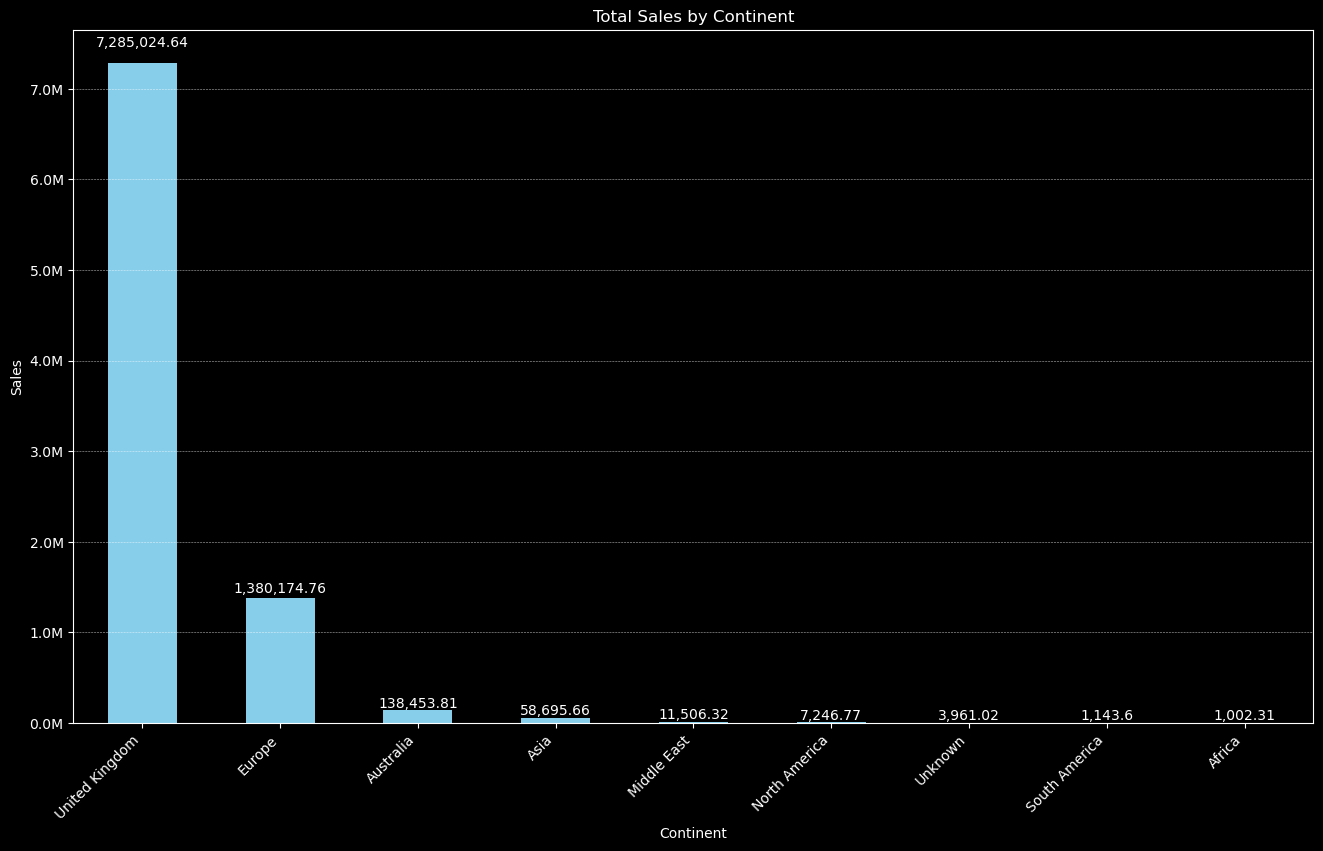

In [894]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Assuming df is already prepared and processed
# Filter out rows where Quantity is 0
df_filtered = df[df['Quantity'] != 0]

sales_by_continent = df_filtered.groupby('Continent')['Totalsale'].sum()
sales_by_continent = sales_by_continent.sort_values(ascending=False)

plt.style.use('dark_background')
plt.figure(figsize=(16, 9))

# Plotting sales by continent
sales_by_continent.plot(kind='bar', color='skyblue')

plt.grid(axis='y', color='w', linestyle='--', linewidth=0.4, alpha=0.7)
plt.title('Total Sales by Continent')
plt.xlabel('Continent')
plt.ylabel('Sales')
plt.xticks(rotation=45, ha='right')

def millions_formatter(x, pos):
    return f'{x / 1e6:.1f}M'

for i, v in enumerate(sales_by_continent):
    plt.text(i, v + 0.02 * v, f'{v:,}', ha='center', va='bottom', fontsize=10)

# Apply the formatter to the y-axis
formatter = FuncFormatter(millions_formatter)
plt.gca().yaxis.set_major_formatter(formatter)

plt.show()


In [891]:
# Filter rows where Quantity is greater than 0
df_filtered = df[df['Quantity'] > 0]

# Extracting the rows where the most expensive product was sold in each country
max_price_products = df_filtered.loc[df_filtered.groupby('Country')['UnitPrice'].idxmax()]

# Group by Country and find the maximum UnitPrice and corresponding Quantity
countries_with_max_price = max_price_products.groupby('Country').agg({'UnitPrice': 'max', 'Quantity': 'sum'})

# Display the countries with the highest UnitPrice and corresponding Quantity
print("Countries with the Most Expensive Product Sold:")
print(countries_with_max_price.sort_values(by='UnitPrice', ascending=False))


Countries with the Most Expensive Product Sold:
                          UnitPrice  Quantity
Country                                      
United Kingdom              8142.75         1
France                      4161.06         1
Singapore                   3949.32         1
Ireland                     1687.17         1
Portugal                    1241.98         1
Norway                       700.00         1
Germany                      599.50         1
Canada                       550.94         1
Australia                    350.00         1
Cyprus                       320.69         1
Italy                        300.00         1
Channel Islands              293.00         1
Finland                      275.60         2
Israel                       125.00         1
Netherlands                  110.00         2
Malta                         65.00         7
Spain                         65.00         1
Greece                        50.00         2
Switzerland                   40

In [311]:
#Checking what is the most expencive product
most_expencive= df['UnitPrice'].max()
most_expencive

8142.75

This script identifies and displays the countries where the most expensive product was sold. It calculates the highest unit price for each country and shows the total quantity of that product sold in each country.

In [889]:
# Extracting the list where the most expensive product was sold
max_price_products = df.loc[df.groupby('Country')['UnitPrice'].idxmax()]

# Group by Country and find the maximum UnitPrice
countries_with_max_price = max_price_products.groupby('Country')['UnitPrice'].max()

# Display the countries with the highest UnitPrice
print("Countries with the Most Expensive Product Sold:")
print(countries_with_max_price.sort_values(ascending=False))


Countries with the Most Expensive Product Sold:
Country
United Kingdom              38970.00
France                       4161.06
Singapore                    3949.32
Spain                        1715.85
Ireland                      1687.17
Portugal                     1241.98
Norway                        700.00
Germany                       599.50
Canada                        550.94
Australia                     350.00
Cyprus                        320.69
Italy                         300.00
Channel Islands               293.00
Finland                       275.60
Netherlands                   206.40
Israel                        125.00
Malta                          65.00
Greece                         50.00
Japan                          45.57
Switzerland                    40.00
Sweden                         40.00
Poland                         40.00
Czech Republic                 40.00
Austria                        40.00
Belgium                        39.95
United Arab Emirate

In [312]:
#Checking what is the most affordable product
most_affordable= df['UnitPrice'].min()
most_affordable

0.04

In [313]:
#Eliminating rows where Uniteprice is bellow 0
df=df[df['UnitPrice'] >=0]

This script finds and lists the top 10 customers who spend the most and those who make the most purchases. It helps identify valuable customers based on their buying habits.

In [314]:
#Customer Se

df_unassigned = df[df['CustomerID'] != 'Unassigned']

# Group by CustomerID and aggregate Totalsale and count of InvoiceNo
customer_sales_orders = df_unassigned.groupby('CustomerID').agg({
    'Totalsale': 'sum',
    'InvoiceNo': 'count'
}).reset_index()

# Rename columns for clarity
customer_sales_orders.columns = ['CustomerID', 'TotalSales', 'TotalOrders']

# Sort and select top 10 customers by TotalSales
top_10_customers_sales = customer_sales_orders.sort_values(by='TotalSales', ascending=False).head(10)

# Sort and select top 10 customers by TotalOrders
top_10_customers_orders = customer_sales_orders.sort_values(by='TotalOrders', ascending=False).head(10)

print("Top 10 Customers by Total Sales:")
print(top_10_customers_sales)
print("\nTop 10 Customers by Total Orders:")
print(top_10_customers_orders)

Top 10 Customers by Total Sales:
      CustomerID  TotalSales  TotalOrders
1686     14646.0   280206.02         2076
4196     18102.0   259657.30          431
3723     17450.0   194390.79          336
3003     16446.0   168472.50            3
1876     14911.0   143711.17         5670
54       12415.0   124914.53          714
1331     14156.0   117210.08         1395
3766     17511.0    91062.38          963
2698     16029.0    80850.84          241
0        12346.0    77183.60            1

Top 10 Customers by Total Orders:
      CustomerID  TotalSales  TotalOrders
4005     17841.0    40519.84         7676
1876     14911.0   143711.17         5670
1287     14096.0    65164.79         5111
324      12748.0    33053.19         4412
1658     14606.0    12076.15         2677
2172     15311.0    60632.75         2366
1686     14646.0   280206.02         2076
560      13089.0    58762.08         1814
688      13263.0     7436.93         1667
1431     14298.0    51527.30         1637


In [315]:
# Group by 'Country' and get the index of the rows with the highest 'UnitPrice' in each group
idx = df.groupby('Country')['UnitPrice'].idxmax()

# Use these indices to extract the corresponding rows from the original DataFrame
expensive_products_by_country = df.loc[idx]

# Sort the results by 'Country' and 'UnitPrice' for clarity
expensive_products_by_country = expensive_products_by_country.sort_values(by=['Country', 'UnitPrice'], ascending=[True, False])

# Display the result
print(expensive_products_by_country)

       InvoiceNo InvoiceDate         InvoiceTime StockCode  \
142988    548661  2011-04-01 1900-01-01 14:28:00      POST   
34300     539330  2010-12-17 1900-01-01 09:38:00      POST   
181145    552449  2011-05-09 1900-01-01 13:49:00     22423   
306899    563852  2011-08-19 1900-01-01 15:18:00     84816   
157299    550201  2011-04-15 1900-01-01 10:25:00     22423   
264976    560187  2011-07-15 1900-01-01 12:05:00      POST   
194242    553559  2011-05-17 1900-01-01 17:12:00         M   
96678     544578  2011-02-21 1900-01-01 14:04:00         M   
383505    570026  2011-10-07 1900-01-01 10:37:00      POST   
20036     538003  2010-12-09 1900-01-01 12:05:00      POST   
106609    545336  2011-03-01 1900-01-01 16:53:00         M   
422351    573077  2011-10-27 1900-01-01 14:13:00         M   
398150    571223  2011-10-14 1900-01-01 13:36:00         M   
150143    549325  2011-04-08 1900-01-01 10:32:00      POST   
72267     542237  2011-01-26 1900-01-01 14:30:00     22423   
117054  

In [193]:
#searching for the country with the highest number of most expencise units bought
#As we can see the most expecive products are goin to UK, reason why the highes sales are coming from that country

expencive_unit_continent= df.groupby('Country')['UnitPrice'].max().sort_values(ascending= False)
expencive_unit_continent

Country
United Kingdom              13541.33
France                       4161.06
Singapore                    3949.32
Hong Kong                    2653.95
Ireland                      1917.00
Portugal                     1241.98
Norway                        700.00
Germany                       599.50
Canada                        550.94
Australia                     350.00
Cyprus                        320.69
Italy                         300.00
Channel Islands               293.00
Finland                       275.60
Israel                        125.00
Netherlands                   110.00
Malta                          65.00
Spain                          65.00
Greece                         50.00
Poland                         40.00
Czech Republic                 40.00
Austria                        40.00
Switzerland                    40.00
Sweden                         40.00
Belgium                        39.95
United Arab Emirates           37.50
Denmark                       